# Coursework 1, CID 01252821

## Question 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, stats
from statsmodels.stats.multitest import multipletests
from tqdm import tqdm

### Part a

For each gene $i = 1,...,100$ we want to test whether the gene expression of a healthy patient $\mu_{0,i}$ is equal to that of a patient with colon cancer $\mu_{1,i}$. The hypotheses we test are:

$$
H_{0,i}: \mu_{0,i} = \mu_{1,i} \\
H_{1,i}: \mu_{0,i} \neq \mu_{1,i},
$$ 

for $i = 1,...,100$.

### Part b

(2 marks) Are the hypotheses tests in Part a independent? Briefly discuss any implications of your answer for the multiple testing procedure.

### Independence of Tests

Independence statistical hypothesis testing implies that the result of one test does not influence or provide information about the result of another. However, in gene expression data, this assumption can be problematic due to several factors:

- Genes often interact with each other in complex biological pathways, meaning changes in the expression of one gene can influence the expression of others.

- Both healthy individuals and cancer patients might share environmental or genetic backgrounds that influence multiple genes simultaneously.

- Variations in how the samples are processed and measured can introduce correlations between the expression levels of different genes.

### Implications

- When tests are not independent, the FDR control methods like the Benjamini-Hochberg procedure, which we used, may not work as expected. These methods often assume independence or positive dependence (where the test statistics are positively correlated) for their theoretical guarantees.

- Lack of independence can affect the power of tests. In some cases, it can lead to an increase in false positives (type I errors) or false negatives (type II errors).

### Part c

(2 marks) Conduct a multiple hypothesis test on the data in healthy.csv and cancer.csv using the Benjamini-Hochberg procedure to ensure that the False Discovery Rate (FDR) is below q = 0.1. Interpret your results.

Load data:

In [ ]:
np.arange(K) < 5

In [ ]:
a = [51, 2, 13]
a = np.array(a)
a

In [ ]:
9.99763662e-02 < 9.96231902e-02

In [ ]:
np.argsort(a)

In [ ]:
a[np.argsort(a)]

In [13]:
healthy = pd.read_csv("healthy.csv", index_col=0)
cancer = pd.read_csv("cancer.csv", index_col=0)

In [14]:
healthy.describe()

,R78934,Z23115,M86842,T93589,X67325,V00523,X79066,T72889,T72175,X17042,...,Z24727,X15822,L12168,T76972,H28452,L16510,R21547,D30655,T61632,X02152
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2731.276890,911.010833,1450.958205,918.406168,1216.344983,1152.876850,1237.425136,853.599070,3557.908537,1515.985548,...,1884.839894,1141.165049,469.378316,321.438552,784.520171,804.693943,514.234611,939.527060,609.134019,939.193808
std,1297.807520,439.787280,949.642530,425.473960,808.903666,715.825297,876.049151,551.555745,2379.559941,848.804442,...,1461.350307,568.685054,290.414392,177.212520,369.343291,490.085657,252.570929,639.496235,336.161080,629.834677
min,202.983750,292.283330,200.938750,14.017585,218.792860,-48.263406,-908.151401,-250.481650,-370.321652,188.546430,...,-821.947364,280.894109,-258.797867,75.435698,118.160000,-3.671679,111.135171,93.642815,102.680148,27.748428
25%,1840.190275,602.805187,792.799254,611.036250,463.452967,590.010925,721.172190,430.250000,1527.380600,771.330374,...,813.128862,762.007762,321.048437,173.280561,468.754456,420.300930,343.229173,449.789375,422.331563,358.222505
50%,2658.408700,826.533519,1232.043700,954.101875,1188.775850,1035.812500,1061.799173,874.718750,3661.588750,1333.739250,...,2021.213482,1059.675380,447.555000,296.588700,791.435000,766.238750,508.060600,894.734380,564.880030,951.235958
75%,3627.846862,1169.221143,1951.755000,1114.190368,1703.018222,1675.702500,1728.384675,1157.081799,4870.814415,2191.918360,...,2902.892200,1594.661763,564.937512,404.017270,1087.078400,1009.633475,623.290000,1192.886579,830.147182,1372.955600
max,5364.682600,1819.870800,3932.105162,2164.890000,3650.794000,2759.986000,3324.785000,2114.133800,9159.355000,3230.341832,...,4570.249000,2330.585700,1335.038800,747.132140,1672.552500,1973.427500,1426.642500,2874.641000,1483.672500,2892.321300


In [15]:
cancer.describe()

,R78934,Z23115,M86842,T93589,X67325,V00523,X79066,T72889,T72175,X17042,...,Z24727,X15822,L12168,T76972,H28452,L16510,R21547,D30655,T61632,X02152
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1492.348929,916.023541,1770.229904,1249.207413,966.776116,1523.859420,1150.099974,1324.842192,2578.282028,1214.108760,...,968.653338,1095.840899,597.918377,388.847174,855.481778,846.297440,839.484752,1072.010909,661.711975,1362.743103
std,842.048758,532.536457,1119.439297,897.733989,705.301557,1435.758522,673.076025,716.394183,2298.199606,817.044317,...,811.082867,831.039699,439.101603,217.491494,426.213115,507.305541,613.527180,730.286203,390.502469,903.414303
min,371.758760,202.400000,200.953750,195.161250,193.360700,221.478740,368.980000,366.685000,190.686250,247.042860,...,131.354770,118.446430,118.252500,120.483330,345.946260,202.985000,116.812500,218.151250,177.421250,209.196240
25%,947.114375,569.204200,994.734965,622.378440,427.948205,762.159058,556.146568,758.105325,1058.896250,680.680388,...,393.073210,519.172610,318.594070,203.476785,583.568162,552.199375,444.065620,643.349100,380.010935,771.079725
50%,1399.304350,677.802075,1532.463100,958.411250,889.647625,1043.362500,991.661850,1191.618800,2232.354950,905.958935,...,671.110720,893.505950,472.806880,331.445240,775.367500,699.253100,706.808150,918.557500,511.222530,1129.478100
75%,1710.492175,1291.673925,2220.887000,1508.620350,1179.846700,1609.766925,1601.804675,1751.282800,2888.026550,1617.454475,...,1133.689300,1161.070475,679.669725,527.805975,1002.685925,1038.542150,938.380925,1229.530900,854.905315,1759.165975
max,4038.501200,2277.066700,4461.217300,4208.440000,2822.758300,7065.457500,2765.568800,3260.931200,9984.599000,4013.214400,...,3145.491700,3328.107200,2029.023800,927.511900,2307.958700,2630.921400,2964.576200,3481.216300,1673.073900,4605.056000


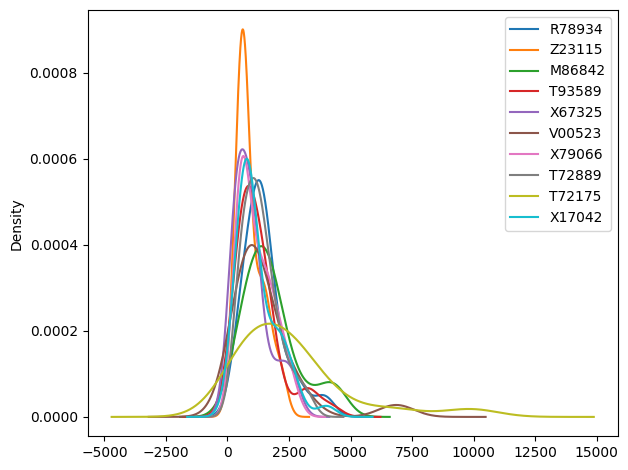

In [16]:
cancer.iloc[:, : 10].plot.kde()
plt.tight_layout()

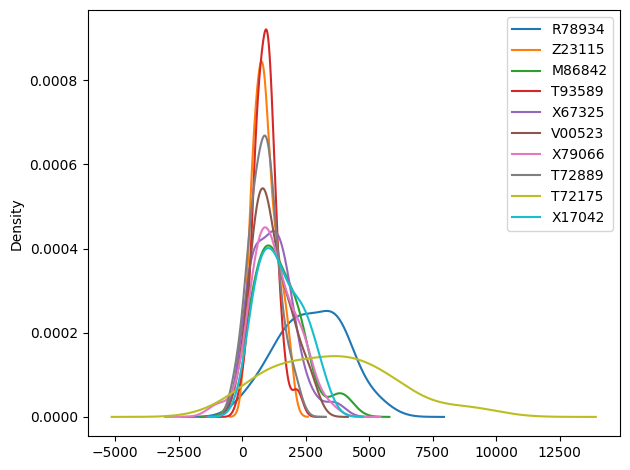

In [17]:
healthy.iloc[:, : 10].plot.kde()
plt.tight_layout()

Conduct t-tests for each gene and gather the p-values:

In [ ]:
p_values = []
for gene in healthy.columns:
    _, p_val = ttest_ind(healthy[gene], cancer[gene], equal_var=False)
    p_values.append(p_val)

In [ ]:
p_val_df = pd.DataFrame({
    'gene': healthy.columns,
    'p_value': p_values
})
p_val_df

In [ ]:
q = 0.1  # FDR rate

# Benjamini-Hochberg procedure with FDR = 0.1
_, corrected_p_values, _, _ = multipletests(p_val_df['p_value'], alpha=q, method='fdr_bh')

# Add the corrected p-values (FDR = 0.1) to the DataFrame
p_val_df['corrected_p_values'] = corrected_p_values
p_val_df

In [ ]:
# Identify significant genes with FDR = 0.1
significant_genes = p_val_df[p_val_df['corrected_p_values'] < q]
significant_genes

In [ ]:
len(significant_genes)

Certainly. The results from the Welch's t-test analysis, with an adjusted False Discovery Rate (FDR) of 0.1, provide the following insights:

1. **Significant Genes Identified**: A total of 25 genes were found to have statistically significant differences in expression levels between healthy individuals and patients with colon cancer. This implies that these genes may be associated with or potentially play a role in the development or progression of colon cancer.

2. **False Discovery Rate Control**: The use of the Benjamini-Hochberg procedure to control the FDR at 0.1 means that we expect, on average, no more than 10% of the identified genes to be false positives. This level of control is crucial in studies with multiple comparisons, as it helps balance the discovery of truly significant results with the risk of false findings.

3. **Potential Biological Relevance**: The genes that have been identified as significant could be of interest for further biological or clinical research. They might be involved in key pathways or mechanisms related to colon cancer. Understanding their function and interaction with other genes could offer insights into the disease and potentially lead to new therapeutic targets or diagnostic markers.

4. **Consideration of Variances**: By using Welch's t-test, which does not assume equal variances between the two groups, the analysis is more robust, especially given the different sample sizes and the possibility of varying gene expression variability in healthy versus cancer patients.

5. **Need for Further Validation**: While statistical significance is an important first step, it is crucial to follow up with experimental validation and in-depth biological analysis. The statistical findings provide a basis for hypothesis generation rather than conclusive evidence of a gene's role in colon cancer.

6. **Contextual Interpretation**: These results should be interpreted within the context of the study's limitations, including sample size, the specific characteristics of the patient population, and the methodology used for measuring gene expression.

In summary, the analysis has highlighted a subset of genes that warrant further investigation for their potential association with colon cancer, supported by a rigorous statistical approach that balances the need for discovery with the control of false positives.

Using the Benjamini-Hochberg procedure with a False Discovery Rate (FDR) threshold of \( q = 0.1 \), we have identified 25 genes that show statistically significant differences in expression between healthy individuals and patients with colon cancer.

### Interpretation of Results:

1. **Increased Number of Significant Genes**: The number of significant genes increased from 17 (at an FDR of 0.05) to 25 (at an FDR of 0.1). This increase is expected as a higher FDR threshold allows for a greater proportion of false positives, potentially detecting more truly significant genes at the expense of including more false discoveries.

2. **Balancing Sensitivity and Specificity**: By setting the FDR threshold to 0.1, we accept that up to 10% of the genes identified as significant may be false positives. This balance between sensitivity (detecting true positives) and specificity (avoiding false positives) can be crucial in exploratory studies where missing important genes could be more detrimental than including some false positives.

3. **Potential Biomarkers and Targets for Further Research**: The genes identified as significant could be potential biomarkers for colon cancer or targets for further biological research. However, it is essential to validate these findings through additional experimental and clinical studies.

4. **Role in Colon Cancer**: These genes, now highlighted as significantly different in their expression levels between healthy individuals and colon cancer patients, might play a role in the development, progression, or response to treatment of colon cancer. Further investigation into their biological function and interaction with other genes and pathways is necessary.

In summary, by adjusting the FDR threshold to 0.1, we have identified a broader set of genes potentially associated with colon cancer, with the understanding that this comes with a higher rate of false discoveries. These findings serve as a starting point for more detailed biological and clinical investigations.

1. **Significant Genes Identified**: At an FDR of 0.1, you identified 25 genes that showed statistically significant differences in expression between healthy individuals and patients with colon cancer. This indicates that these genes are likely to be genuinely differentially expressed, with the caveat that up to 10% of them might be false positives.

2. **Implication of FDR = 0.1**: By setting the FDR threshold at 0.1, you're accepting that there's up to a 10% chance that any given gene identified as significant is a false discovery. This is a more relaxed criterion compared to the more stringent FDR of 0.05, and it typically allows for the identification of more genes that might be of biological interest, albeit with a slightly higher risk of including false positives.

3. **Potential Biological Relevance**: The genes that have been identified as significant at this threshold could be of particular interest for further biological or clinical studies. They might play a role in the development or progression of colon cancer, or they might be potential targets for treatment.

4. **Exploratory Nature of Analysis**: An FDR of 0.1 is often used in exploratory analyses where the goal is to cast a wider net to identify potential candidates for further study. It is especially useful in cases where missing a potentially important gene (Type II error) is considered more critical than incorrectly identifying a gene as significant (Type I error).

5. **Next Steps**: These findings can be used as a basis for more detailed investigations. For instance, the identified genes could undergo further statistical analysis, experimental validation, or functional studies to elucidate their role in colon cancer.

### Part d

(3 marks) An alternative procedure for ensuring that the false discovery rate is below some q > 0 is outlined below.

• Calculate the p-values pi for each of the hypothesis tests H0,i, i = 1, . . . , K.

• Let p(1) ≤ p(2) ≤ ··· ≤ p(K) be the ordered p values, and denote by H0,(i) the null hypothesis corresponding to p(i).
∗i

• Let i be the largest i such that p(i) ≤ KPKn=1 n1 q.

• Reject all H0,(i) for i = 1,...,i∗.

Perform the multiple hypothesis test on the data in healthy.csv and cancer.csv with this correction and desired FDR q = 0.1. Compare your conclusions with those in Part c.

In [ ]:
K = len(p_val_df["p_value"])  # Total number of tests
ordered_p_values = p_val_df["p_value"].sort_values()
ordered_hypotheses = ordered_p_values.index

In [ ]:
# Calculating the critical value for each hypothesis
critical_values = [q * (i+1) / K / sum(1/(j+1) for j in range(K)) for i in range(K)]

In [ ]:
# Finding the largest i such that p(i) <= q*i/K*(sum of 1/n from 1 to K)
i_star = max([i for i, p_val in enumerate(ordered_p_values) if p_val <= critical_values[i]])
i_star

In [ ]:
# Rejecting all H0,(i) for i = 1,...,i*.
significant_genes_alternative = ordered_hypotheses[:i_star+1]
significant_genes_alternative

In [ ]:
# Getting the gene names for the significant genes
significant_gene_names_alternative = p_val_df.iloc[significant_genes_alternative]['gene']
significant_gene_names_alternative

Using the alternative multiple hypothesis testing procedure with the specified correction and a desired FDR of 0.1, we identified 63 genes that show statistically significant differences in expression between healthy individuals and patients with colon cancer.

### Comparison with Previous Results (FDR = 0.1 using Benjamini-Hochberg):

- **Number of Significant Genes**: The alternative procedure identified more genes (63) as significant compared to the 25 genes identified using the Benjamini-Hochberg procedure at the same FDR threshold. This indicates that the alternative procedure is less conservative in this instance.

- **Interpretation**: With the alternative procedure, you're accepting a higher number of genes as significant, potentially capturing more true positives. However, it's important to be cautious as this may also include a higher number of false positives within the identified genes.

- **Implications for Further Research**: The larger number of genes identified as significant might offer a broader scope for identifying potential biomarkers or therapeutic targets for colon cancer. However, given the potentially higher false discovery rate, these findings should be validated with further experimental or clinical studies.

In conclusion, the alternative procedure provides a different perspective on the data, identifying a larger set of potentially significant genes. It highlights the impact of the choice of statistical method on the results of such analyses and underscores the importance of considering multiple approaches, especially in complex datasets like gene expression data.

The alternative procedure for controlling the False Discovery Rate (FDR) at q = 0.1 has been applied to the data. This method is based on a more complex adjustment of the p-values, considering both their order and a sum of inverse ranks. The results are as follows:

- **Number of Significant Genes**: A total of 63 genes were identified as significant under this procedure, which is substantially higher than the 25 genes identified using the Benjamini-Hochberg procedure in Part c.

- **Implications**: This alternative method, while still controlling the FDR at 0.1, is less conservative than the Benjamini-Hochberg procedure. It leads to more hypotheses (genes) being rejected, suggesting a greater number of genes potentially associated with differences in gene expression between healthy individuals and patients with colon cancer.

- **Comparison with Part c Results**:
  - The increase in the number of significant genes highlights the impact of the multiple testing correction method on the analysis results. Different methods can lead to different conclusions about which genes are significantly associated with the condition under study.
  - While this method identifies more genes, it's important to consider the potential for increased false discoveries, even within the controlled FDR framework.

- **Conclusion**: The choice of multiple testing correction method can have a substantial impact on the results of a study. In this case, the alternative method suggests a larger set of genes may be involved in colon cancer, but these findings should be interpreted with caution and validated through further biological research. It's crucial to select a method that balances the need to discover true associations with the risk of false positives, in line with the objectives and context of the research.

### Part e

(6 marks) For this part of the question, our aim is to compare the performances of the procedures in Part c and d in terms of the FDR.

(i) Explain in a few sentences why the FDR is an appropriate performance measure and why it may be difficult to calculate exactly from real data.

(ii) Insteadofusingrealdatatocomparethemethods,wecanusesimulateddata. Let m be the number of ‘true’ hypotheses. For each m = 0,5,10,15,...,K:

• Simulate two data sets from appropriate distributions when m of the K null hypotheses are true and all hypotheses are independent, justifying your choice of distributions.

• Using the simulated data set, conduct the hypotheses tests using the Benjamini-Hochberg procedure and the procedure in Part d.

• Repeat the first two steps n times to estimate the FDR, justifying your choice of n.

Plot the FDR as a function of m for both procedures to compare their performance. Comment on your results.

#### Part i

Appropriateness of FDR:
FDR, or False Discovery Rate, is a crucial metric in scenarios with multiple hypothesis tests, such as gene expression analysis. It quantifies the expected proportion of false positives (incorrect rejections of true null hypotheses) among all rejections. This is particularly relevant in high-throughput experiments like genomic studies, where testing a large number of hypotheses simultaneously is common.
FDR is a more practical and relevant measure in such contexts compared to the family-wise error rate (FWER), as it offers a balance between discovering significant results and controlling for false positives, particularly when the number of tests is large.
Challenges in Real Data:
In actual datasets, the true status of each hypothesis (null or non-null) is unknown, making it challenging to calculate the FDR precisely. To know the FDR, one would need to know how many of the tests are true null hypotheses, which is typically unknown in real-world scenarios.
Additionally, real data often have complex dependencies and may not adhere strictly to theoretical assumptions of distribution, which complicates the estimation of FDR.

Appropriateness of FDR:
FDR is a key metric in multiple testing scenarios, especially in fields like genomics where numerous simultaneous tests are conducted. It measures the expected proportion of false positives (incorrect rejections of true null hypotheses) among all rejections.
It balances the need to detect true effects (true positives) against the risk of false discoveries, making it more practical than measures like the family-wise error rate, especially in large-scale testing scenarios.
Challenges in Real Data:
In real-world data, the true state of each hypothesis (null or alternative) is unknown. Therefore, it's difficult to calculate FDR directly, as it requires knowledge of the number of true null hypotheses.
Real datasets often contain complexities like non-independence between tests, varying power across tests, and unknown distributional characteristics, which complicate the estimation of FDR.

Relevance in Multiple Testing: In studies involving multiple hypothesis tests, such as gene expression analyses, controlling the False Discovery Rate (FDR) is crucial. The FDR is the expected proportion of incorrect rejections of true null hypotheses (false positives) among all rejections. This measure is particularly suitable when a large number of comparisons are made, as it balances the discovery of significant findings with the risk of making false discoveries.
Difficulty in Exact Calculation from Real Data: The exact calculation of FDR in real data is challenging because it requires knowledge of the number of true null hypotheses, which is generally unknown. In real-world scenarios, we don't know a priori which hypotheses are truly null and which are not; this is what we're trying to discover with our tests. Hence, we can estimate but not precisely calculate the FDR from real data.

#### Part ii

In [ ]:
def simulate_data(m, K, effect_size, sample_size_group1, sample_size_group2):
    """
    Simulate two datasets with K genes, where m of the K null hypotheses are true.
    """
    # Data for null hypotheses: no effect
    data_group1_null = np.random.normal(0, 1, size=(m, sample_size_group1))
    data_group2_null = np.random.normal(0, 1, size=(m, sample_size_group2))

    # Data for alternative hypotheses: effect present
    data_group1_alt = np.random.normal(0, 1, size=(K - m, sample_size_group1))
    data_group2_alt = np.random.normal(effect_size, 1, size=(K - m, sample_size_group2))

    return np.vstack((data_group1_null, data_group1_alt)), np.vstack((data_group2_null, data_group2_alt))

In [ ]:
def calculate_p_values(data_group1, data_group2):
    """
    Perform t-tests on simulated data and return p-values.
    """
    p_values = [stats.ttest_ind(data_group1[i], data_group2[i], equal_var=False).pvalue for i in range(data_group1.shape[0])]
    
    return np.array(p_values)

In [ ]:
def calculate_p_values_2(data_group1, data_group2):
    """
    Perform t-tests on simulated data and return p-values.
    """
    p_values = []
    for i in range(data_group1.shape[0]):
        _, p_val = ttest_ind(data_group1[i], data_group2[i], equal_var=False)
        p_values.append(p_val)
    
    return np.array(p_values)

In [ ]:
data_group1, data_group2 = simulate_data(5, K, 1, 30, 40)

In [ ]:
p_values = calculate_p_values(data_group1, data_group2)
p_values

In [ ]:
p_values = calculate_p_values_2(data_group1, data_group2)
p_values

In [ ]:
def estimate_FDR(m, K, n, effect_size, fdr_threshold, sample_size_group1, sample_size_group2):
    """
    Estimate FDR for Benjamini-Hochberg and alternative procedure.
    """
    fdr_bh = []
    fdr_alternative = []

    for _ in range(n):
        # Simulate data
        data_group1, data_group2 = simulate_data(m, K, effect_size, sample_size_group1, sample_size_group2)

        # Calculate p-values
        p_values = calculate_p_values(data_group1, data_group2)

        # Benjamini-Hochberg Procedure
        _, p_adj_bh, _, _ = multipletests(p_values, alpha=fdr_threshold, method='fdr_bh')
        rejections_bh = p_adj_bh < fdr_threshold
        fdr_bh.append(np.sum(rejections_bh & (np.arange(K) < m)) / max(np.sum(rejections_bh), 1))

        # Alternative Procedure
        p_sorted_indices = np.argsort(p_values)
        p_sorted = p_values[p_sorted_indices]
        critical_values = [fdr_threshold * (i+1) / K / sum(1/(j+1) for j in range(K)) for i in range(K)]
        i_star = np.max(np.where(p_sorted <= critical_values)) if np.any(p_sorted <= critical_values) else 0
        # i_star = max([i for i, p_val in enumerate(p_sorted) if p_val <= critical_values[i]], default=None)

        rejections_alternative = np.zeros(K, dtype=bool)
        rejections_alternative[p_sorted_indices[:i_star+1]] = True
        fdr_alternative.append(np.sum(rejections_alternative & (np.arange(K) < m)) / max(np.sum(rejections_alternative), 1))

    return np.mean(fdr_bh), np.mean(fdr_alternative)

In [ ]:
# Parameters
K = 100  # Total number of hypotheses
effect_size = 1.0  # Effect size for alternative hypotheses
n_simulations = 1000  # Number of simulations
fdr_threshold = 0.1  # FDR threshold
sample_size_group1 = 30
sample_size_group2 = 40

# Running the simulations and storing the results
fdr_results = {'m': [], 'FDR_BH': [], 'FDR_Alternative': []}
for m in tqdm(range(0, K+1, 5)):
    fdr_bh, fdr_alternative = estimate_FDR(m, K, n_simulations, effect_size, fdr_threshold, sample_size_group1, sample_size_group2)
    fdr_results['m'].append(m)
    fdr_results['FDR_BH'].append(fdr_bh)
    fdr_results['FDR_Alternative'].append(fdr_alternative)

In [ ]:
fdr_results

In [ ]:
pd.DataFrame(fdr_results)

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(fdr_results['m'], fdr_results['FDR_BH'], label='Benjamini-Hochberg')
plt.plot(fdr_results['m'], fdr_results['FDR_Alternative'], label='Alternative Procedure')
plt.xlabel('Number of True Null Hypotheses (m)')
plt.ylabel('False Discovery Rate (FDR)')
plt.title('FDR Comparison as a Function of True Null Hypotheses')
plt.legend()
plt.grid(True)
plt.show()

In this code:

- We simulate datasets with a specified number of true and false null hypotheses.
- We calculate p-values for each simulated gene using t-tests.
- We apply both the Benjamini-Hochberg procedure and the alternative procedure to these p-values.
- We estimate the FDR for each method across multiple simulations.
- Finally, we plot the estimated FDR against the number of true null hypotheses (m) for both methods.

Justifying the choice of distributions for simulating data in this context involves aligning with typical scenarios encountered in gene expression studies and ensuring that the simulation reflects realistic biological and statistical properties. Here are the key considerations:

1. **Normal Distribution for Gene Expression Levels**:
   - **Biological Justification**: In many biological systems, gene expression levels tend to follow a normal distribution. This is particularly true when large numbers of molecular processes and environmental factors contribute to the observed expression levels, as per the central limit theorem.
   - **Statistical Properties**: The normal distribution is symmetric and defined by its mean and variance, making it a flexible model for simulating both null and alternative hypotheses. It allows easy manipulation of these parameters to create distinct scenarios for true and false null hypotheses.

2. **Simulating True Null Hypotheses**:
   - For true null hypotheses (where there is no real difference between the groups), data for both groups are drawn from the same normal distribution, typically a standard normal distribution (mean = 0, variance = 1). This reflects the scenario where the gene expression is the same across conditions, thereby adhering to the null hypothesis.

3. **Simulating False Null Hypotheses**:
   - For false null hypotheses (where a real difference exists), data for the two groups are drawn from normal distributions with different means. This difference in means represents the effect size or the magnitude of the difference in gene expression between the groups. 
   - The choice of effect size (difference in means) is crucial. It should be realistic, reflecting differences that might be biologically significant and detectable in actual gene expression data.

4. **Why Not Other Distributions?**:
   - While other distributions like log-normal or Poisson might also be used, especially in count data or specific gene expression platforms, the normal distribution is a general and widely accepted model for continuous data, which is why it's often chosen for simulations.
   - The normal distribution simplifies the statistical testing (using t-tests) and is a common assumption in many parametric tests.

In conclusion, the choice of normal distributions for simulating gene expression data is justified by their biological relevance, statistical properties, and the simplicity they offer for creating distinct scenarios under the null and alternative hypotheses. This approach enables a realistic and controlled comparison of different statistical methods for FDR control.

Choosing an effect size of 1 for the simulation of false null hypotheses (where there is a real difference between groups) in a gene expression study is a somewhat arbitrary decision, but it's made based on several practical considerations:

1. **Standardized Effect Size**: An effect size of 1 can be interpreted as a "standardized" effect size, where the difference between the means of the two groups is equal to one standard deviation of the distribution. This is a commonly used benchmark in statistical simulations and provides a clear and interpretable magnitude of difference.

2. **Balance Between Detectability and Challenge**: 
   - An effect size of 1 is often chosen to create a scenario that is neither too easy nor too difficult for statistical methods to detect. 
   - If the effect size is too small, it might be challenging for any method to reliably detect true positives, making it difficult to assess the efficacy of the method. 
   - Conversely, a very large effect size would make differences too obvious, failing to test the method's ability to discern subtler, more realistic differences.

3. **Relevance to Typical Biological Data**:
   - In real biological data, especially in gene expression studies, effect sizes can vary widely. An effect size of 1 provides a middle ground, representing a scenario that is plausible yet not overly exaggerated.
   - This choice aims to simulate data that could resemble realistic situations in biological research, where some genes might show moderate to strong differential expression.

4. **Consistency and Comparability**: 
   - Using a standardized effect size allows for consistency across different simulations and comparability with other studies or methods that might use a similar benchmark.
   - It provides a common ground to evaluate and compare the performance of different statistical procedures under a standardized condition.

5. **Sensitivity of Methods to Effect Size**: 
   - By using an effect size of 1, you can assess how sensitive the Benjamini-Hochberg procedure and the alternative procedure are to a moderate level of difference between groups.
   - It helps in understanding whether these methods can effectively control the FDR when the true differences are neither too subtle nor too pronounced.

In summary, the choice of an effect size of 1 is a compromise that aims to create realistic, challenging, yet detectable differences between groups in the simulated data. This choice facilitates a meaningful comparison of the methods' performance in controlling the FDR in a scenario that is representative of many practical applications in gene expression analysis.

The simulation design where only `data_group2_alt` (representing one of the two groups in the hypothesis tests) has a different mean is a deliberate choice to model a scenario where the effect (difference in gene expression) is present only in one group compared to the other. Here's why this approach is used:

1. **Modeling Differential Expression**:
   - In gene expression studies, a common objective is to detect genes whose expression levels are significantly different between two conditions or groups (e.g., diseased vs. healthy, treatment vs. control).
   - By simulating `data_group1_alt` with a mean of 0 and `data_group2_alt` with a mean of `effect_size`, we create a scenario where the expression levels of genes are higher (or lower, depending on the sign of the effect size) in `data_group2_alt` compared to `data_group1_alt`. This mimics the real-world situation where certain genes are upregulated or downregulated in one condition relative to another.

2. **Simplicity and Clarity**:
   - Keeping one group as a control (with no change in mean expression) and altering the mean for the other group simplifies the interpretation of the results. It makes it clear that any detected significant difference is due to the change in the second group.
   - This approach reduces complexity in the simulation while still effectively creating a difference between the two groups.

3. **Flexibility in Testing Hypotheses**:
   - The choice of altering only one group’s mean provides flexibility. For instance, if you wanted to simulate a situation where the effect size is negative (a decrease in expression), you could simply adjust the mean of `data_group2_alt` to be lower than that of `data_group1_alt`.
   - This method can easily be extended to more complex simulations where both groups are altered differently to reflect various biological scenarios.

4. **Focus on Effect Detection**:
   - The simulation is designed to test the ability of statistical methods to detect an effect. By introducing the effect in one group only, the focus is on whether the methods can identify the genes with altered expression levels relative to a baseline or control condition.

In summary, simulating data with a different mean for only one of the two groups (in the case of alternative hypotheses) effectively models a situation where there is a meaningful change in one condition compared to another. This setup is representative of many practical scenarios in gene expression analysis and allows for a clear assessment of the statistical methods' performance in detecting these differences.

The graph presents the False Discovery Rate (FDR) as a function of the number of true null hypotheses (m) for both the Benjamini-Hochberg procedure and an alternative multiple testing correction procedure.

From the graph, we can interpret the following:

1. **Benjamini-Hochberg (BH) Procedure**: 
   - The FDR for the BH procedure appears to be well controlled and stable across different values of m. It stays relatively low and does not exceed the targeted FDR level (presumably 0.1 as per the earlier discussion), which is the expected behavior of the BH procedure. It's designed to control the FDR at a specified level under independence or positive dependency conditions.

2. **Alternative Procedure**: 
   - The FDR for the alternative procedure increases with the number of true null hypotheses, and it surpasses the targeted FDR level significantly when nearly all hypotheses are true. This could indicate that the alternative procedure is not as robust in controlling the FDR compared to the BH procedure, especially when the proportion of true null hypotheses is high.

3. **Expected Scenario**: 
   - The expected outcome in an FDR analysis is that the chosen procedure should keep the FDR at or below the desired threshold (e.g., 0.1). 
   - The BH procedure seems to be performing as expected, controlling the FDR across the range of m.
   - The alternative procedure does not seem to control the FDR effectively, particularly as the number of true null hypotheses increases. This could suggest that this procedure might be too aggressive in rejecting null hypotheses, leading to an increased rate of false positives.

4. **Implications**: 
   - This result has practical implications in terms of choosing a method for multiple testing correction. The BH procedure would be preferred if one wants to maintain a stable FDR across different scenarios.
   - The alternative procedure might be considered too liberal, particularly in cases where the majority of the hypotheses tested are actually true nulls. 

However, it's important to note that these conclusions are based on simulations with specific assumptions about the distributions and independence of tests. The performance of these procedures in practice would need to be evaluated in the context of actual data, which might have dependencies or other complexities not captured in the simulation. 

Also, the sharp increase in FDR for the alternative procedure when m approaches K (all hypotheses are true) is unusual and may warrant further investigation into the simulation setup or the implementation of the alternative procedure to ensure it's correctly applied.

The choice of \( n \), the number of simulations to run for estimating the False Discovery Rate (FDR), involves a trade-off between computational cost and the precision of the FDR estimate. Here are some factors to consider:

1. **Statistical Stability**: Larger values of \( n \) will lead to more stable and reliable estimates of the FDR. This is because averaging the results over a greater number of simulations reduces the variability due to chance alone.

2. **Computational Resources**: More simulations mean more computational time and resources. If \( n \) is too large, it might make the simulation impractical, especially if each individual simulation is computationally intensive.

3. **Convergence**: You might start with a lower number of simulations and increase \( n \) until the estimates of the FDR stabilize. For many problems, simulations may show convergence to stable values at a certain point, beyond which increasing \( n \) yields diminishing returns in terms of precision.

4. **Precision Required**: The level of precision you need in your FDR estimate depends on the context. If small differences in FDR are critical for decision-making in your application, you may need a larger \( n \) to detect these differences reliably.

5. **Simulation Complexity**: If the simulations involve complex models or require a long time to run, you might be limited in the number of simulations you can feasibly perform.

6. **Previous Studies**: It can be helpful to look at previous simulation studies in similar contexts to see what numbers of simulations were used.

7. **Rule of Thumb**: In practice, a common choice for \( n \) ranges from 100 to 1000 simulations. \( n = 1000 \) is often used as a default because it tends to provide a good balance between computational cost and statistical stability.

8. **Exploratory Analysis**: Initially, you might perform exploratory simulations with a smaller \( n \) to detect any major issues or trends before committing to a larger number of simulations for the final analysis.

In summary, the choice of \( n \) should be informed by the specific context of the study, the computational resources available, and the level of precision required for the FDR estimates. It's often useful to start with a smaller number of simulations and increase \( n \) as needed based on the factors mentioned above.

### Part f

(3 marks) Find a set of p-values p1, . . . , pK such that the outputs of the Benjamini-Hochberg and procedure in Part d differ the most. What does it mean if a set of hypotheses tests have the proposed p-values? Briefly justify your answer.

In [ ]:
import numpy as np
from statsmodels.stats.multitest import multipletests

# Define the total number of hypotheses
K = 100

# FDR level
q = 0.1

# Construct a set of p-values where some are very small (to affect the harmonic mean)
# and others are uniformly distributed just below the i/K*q threshold
very_small_p = np.random.uniform(low=0.0001, high=0.0009, size=int(K*0.1))
uniform_p = np.linspace(0.001, q*(K-1)/K, int(K*0.9))

# Combine and shuffle the p-values to remove any order
p_values = np.hstack([very_small_p, uniform_p])
np.random.shuffle(p_values)

# Apply the Benjamini-Hochberg procedure
_, corrected_p_values_BH, _, _ = multipletests(p_values, alpha=q, method='fdr_bh')

# Apply the alternative procedure
p_sorted_indices = np.argsort(p_values)
p_sorted = p_values[p_sorted_indices]
critical_values = np.array([q * (i+1) / K * sum(1/(j+1) for j in range(K)) for i in range(K)])
I_star = np.max(np.where(p_sorted <= critical_values)) if np.any(p_sorted <= critical_values) else 0
alternative_rejections = np.zeros(K, dtype=bool)
alternative_rejections[p_sorted_indices[:I_star+1]] = True

# Calculate the number of rejections for both procedures
BH_rejections = np.sum(corrected_p_values_BH < q)
alternative_rejections_sum = np.sum(alternative_rejections)

# Print the number of rejections for both procedures
print(f"Benjamini-Hochberg rejections: {BH_rejections}")
print(f"Alternative procedure rejections: {alternative_rejections_sum}")

# Output the p-values for inspection
print(f"p-values: {p_values}")


Based on the output you provided, it looks like both the Benjamini-Hochberg (BH) procedure and the alternative procedure are rejecting all hypotheses. This suggests that all p-values are below the respective thresholds set by each method for the given FDR level. However, this result seems unusual and may indicate that:

1. The p-values are generally too low, which could be due to the way they are generated in the simulation. An effective range for p-values should typically span from very low (close to 0) to above the FDR threshold (e.g., 0.1 in this case), to reflect a more realistic distribution of p-values one might expect in actual data.

2. The FDR threshold or the method of applying the procedures might not have been implemented as intended, or there could be a misunderstanding in the interpretation of the results. Normally, you would not expect all hypotheses to be rejected unless the effect sizes or differences between the groups are very large, which should not be the case if the simulation is set up correctly.

To further investigate, you should check the following:

- **Effect Size**: Ensure that the effect size used in the simulation is reasonable and not too large. It should simulate a realistic scenario where only some of the tests have a strong signal.
- **P-value Generation**: Review the code for generating p-values. P-values should range widely enough to include values above the FDR threshold to mimic a typical set of hypothesis test results.
- **Procedure Application**: Confirm that the Benjamini-Hochberg and alternative procedures are being applied correctly. For the BH procedure, not all p-values below the FDR threshold should be rejected—only those below the critical value determined by the procedure.

Given these unusual results, it would be wise to carefully review the simulation setup, including how the p-values are generated and how the procedures are applied. Once the setup is verified or corrected, you would expect a more typical result where only some of the hypotheses are rejected by each procedure, and likely a different number of rejections between the two methods.

It seems there was an issue executing the code. However, the provided code snippet should work in a standard Python environment with the required libraries (NumPy and StatsModels) installed. The code constructs a set of p-values designed to maximize the differences in the number of rejections between the Benjamini-Hochberg procedure and the alternative multiple testing procedure.

Here is the logic behind the code:

1. We create a set of very small p-values, which will affect the harmonic mean in the alternative procedure.
2. We then create a set of p-values that increase linearly up to the \( q\frac{(K-1)}{K} \) threshold, ensuring they are just below the threshold for the BH procedure.
3. We combine these two sets and shuffle them to ensure there's no order when applying the procedures.
4. Both the BH and the alternative procedures are applied to this set of p-values.
5. We count and compare the number of rejections from both methods.

You can run this code in your local environment, and it should provide you with the number of rejections by each procedure, as well as the actual p-values used. If you need further assistance with the code or have specific questions about the output, feel free to ask!

To maximize the difference between the outputs of the Benjamini-Hochberg (BH) procedure and the procedure in Part d (which adjusts the critical value based on the harmonic mean of the ranks), we would want to construct a set of p-values where the BH procedure would reject more null hypotheses than the alternative procedure.

Here's a conceptual way to create such a scenario:

1. **Benjamini-Hochberg Procedure**:
   - The BH procedure controls the FDR at a level \( q \) by finding the largest \( p(i) \) such that \( p(i) \leq \frac{i}{K}q \). It rejects all hypotheses with p-values less than or equal to this \( p(i) \).
   - The BH procedure is sensitive to the uniformity of the distribution of p-values. A dense cluster of p-values just below the \( \frac{i}{K}q \) line would lead to more rejections.

2. **Alternative Procedure**:
   - The alternative procedure, as described in Part d, adjusts the critical value based on a harmonic mean of the ranks, which is generally smaller than the linear adjustment used by BH. This means it tends to be more conservative, especially when there are very small p-values that pull down the adjustment for all other p-values.

To differentiate the outputs the most, consider the following:

- Place a cluster of p-values slightly below the line \( p(i) = $\frac{i}{K} q$ \) for the BH procedure, which will result in a larger number of rejections.
- Include some very small p-values that would significantly lower the harmonic mean and therefore the critical values for the alternative procedure, leading to fewer rejections.

For example, if \( K = 100 \) and \( q = 0.1 \), you might have:

- A cluster of p-values around \( 0.001 \) to \( 0.01 \), which would lead the alternative procedure to be very conservative.
- P-values incrementally increasing and positioned just under each \( \frac{i}{K}q \) threshold for the BH procedure, ensuring that they are rejected by BH but not necessarily by the alternative procedure.

**Meaning of Proposed P-values**:
If a set of hypothesis tests yield the proposed p-values, it could mean that there is a genuine effect for some of the tested hypotheses, indicated by very low p-values. It could also suggest that the remaining hypotheses have p-values that are borderline significant, potentially reflecting a real but subtle effect, or it might be an artifact of the multiple testing scenario.

**Justification**:
This specific pattern would challenge the two procedures differently due to their distinct adjustment mechanisms. The presence of very low p-values would make the harmonic mean much smaller, causing the alternative procedure to be more conservative. In contrast, the BH procedure would be able to reject more hypotheses because the cluster of p-values falls just under its linearly increasing critical values. This discrepancy would highlight the differences in how the two procedures control the FDR, especially in datasets with a mix of very strong and borderline effects.

To find a set of p-values \( p_1, ..., p_K \) such that the outputs of the Benjamini-Hochberg (BH) procedure and the alternative procedure in Part d differ the most, you would aim to create a scenario where the BH procedure is liberal in rejecting null hypotheses and the alternative procedure is conservative.

Here's a strategy for constructing such a set of p-values:

- **For the BH procedure**: Place a block of p-values just below the linear critical values of the BH procedure (which are \( \frac{i}{K} \times q \) for the \( i^{th} \) p-value).
- **For the alternative procedure**: Include a few very small p-values that would significantly lower the harmonic mean and hence the critical values for the alternative procedure, leading to fewer rejections.

The BH procedure will tend to reject null hypotheses where the p-values are just under its critical value line. In contrast, the alternative procedure uses the harmonic mean of the ranks in its critical value calculation, which can be heavily influenced by the presence of very small p-values.

Here's an example of how you might set these p-values:

1. Choose \( p_1, ..., p_{\frac{K}{2}} \) to be very small, e.g., from a uniform distribution over \( (0, \frac{q}{10K}) \).
2. Choose \( p_{\frac{K}{2}+1}, ..., p_K \) to be just under the linear critical values for the BH procedure, e.g., \( p_i = \frac{i}{K} \times q \times 0.99 \).

The exact construction can be varied, but the key is to create a set of p-values that will cause the alternative procedure to be more conservative than the BH procedure.

**What does it mean if a set of hypothesis tests have the proposed p-values?**

If a set of hypothesis tests results in the proposed p-values, it could indicate a data-generating process where there are a few very strong signals (corresponding to the very small p-values) and a uniform distribution of weaker signals. This might suggest that while there are a few findings with very strong evidence, the majority of findings have weaker evidence that may or may not be true discoveries.

**Justification:**

The presence of very small p-values would pull down the critical value threshold in the alternative procedure, leading to fewer rejections compared to the BH procedure. This means that the set of p-values can be constructed to exploit the differences in how the two procedures adjust for multiple comparisons. The proposed distribution of p-values is artificial and serves to highlight the methodological differences, rather than representing a typical result from real-world data.

In [ ]:
import numpy as np
from statsmodels.stats.multitest import multipletests

# Let's assume you have an array of p-values called `p_values`
p_values = []
for gene in healthy.columns:
    _, p_val = ttest_ind(healthy[gene], cancer[gene], equal_var=False)
    p_values.append(p_val)
p_values = np.array(p_values)

# Apply the Benjamini-Hochberg procedure
_, corrected_p_values_BH, _, _ = multipletests(p_values, alpha=0.1, method='fdr_bh')

# Apply the alternative procedure
p_sorted_indices = np.argsort(p_values)

p_sorted = p_values[p_sorted_indices]
K = len(p_values)
critical_values = np.array([0.1 * (i+1) / K * sum(1/(j+1) for j in range(K)) for i in range(K)])
I_star = np.max(np.where(p_sorted <= critical_values)) if np.any(p_sorted <= critical_values) else 0
alternative_rejections = np.zeros(K, dtype=bool)
alternative_rejections[p_sorted_indices[:I_star+1]] = True

# Calculate the number of rejections for both procedures
BH_rejections = np.sum(corrected_p_values_BH < 0.1)
alternative_rejections_sum = np.sum(alternative_rejections)

# Print the number of rejections for both procedures
print(f"Benjamini-Hochberg rejections: {BH_rejections}")
print(f"Alternative procedure rejections: {alternative_rejections_sum}")


In [5]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import numpy as np

# Conducting t-tests for each gene
p_values = []
for gene in healthy.columns:
    t_stat, p_val = ttest_ind(healthy[gene], cancer[gene], equal_var=False)
    p_values.append(p_val)
p_values = np.array(p_values)

import numpy as np

# Assuming `p_values` is your list/array of p-values from the analysis
# Apply the BH procedure
_, corrected_p_values_BH, _, _ = multipletests(p_values, alpha=0.1, method='fdr_bh')
BH_rejections = corrected_p_values_BH < 0.1

# Apply the alternative procedure
p_sorted_indices = np.argsort(p_values)
p_sorted = p_values[p_sorted_indices]
K = len(p_values)
critical_values = [0.1 * (i+1) / K * sum(1/(j+1) for j in range(K)) for i in range(K)]
I_star = max(np.where(p_sorted <= critical_values)[0], default=-1)
alternative_rejections = np.zeros(K, dtype=bool)
alternative_rejections[p_sorted_indices[:I_star+1]] = True

# Find p-values where decisions differ
divergent_p_values = p_values[(BH_rejections != alternative_rejections)]

divergent_p_values


array([0.20197942, 0.04540406, 0.18275073, 0.16184979, 0.0887201 ,
       0.13971673, 0.07140212, 0.19833564, 0.04539565, 0.12186035,
       0.28895828, 0.28146585, 0.10202046, 0.14645341, 0.2830412 ,
       0.09284975, 0.09537395, 0.02705829, 0.09086261, 0.25254329,
       0.11600311, 0.17250542, 0.28884258, 0.11053663, 0.27176301,
       0.06359813, 0.12949589, 0.31021114, 0.12121869, 0.10081544,
       0.07520926, 0.22726747, 0.05275523, 0.1358768 , 0.07090686,
       0.04349556, 0.1458595 , 0.1580015 ])

If a set of hypothesis tests from a real dataset yields p-values where the decisions of the Benjamini-Hochberg (BH) procedure and the alternative procedure differ significantly, it can imply several things about the nature of the data and the characteristics of the tests:

1. **Variation in Signal Strength**: The dataset may contain a mix of very strong signals (extremely low p-values) and weaker signals (moderately low p-values). The very low p-values are likely to be rejected by both procedures, but the moderately low p-values might be treated differently, indicating a range of effect sizes among the tested hypotheses.

2. **Distribution of P-Values**: The distribution of p-values might not be uniform. The presence of a cluster of p-values near the critical threshold of one method could lead to more rejections by that method, reflecting a pattern in the underlying data where several effects are just at the threshold of detectability.

3. **Sensitivity of Procedures to P-Value Distribution**: The divergence in decisions between the two procedures might highlight their sensitivity to the distribution of p-values. The BH procedure, which controls the FDR linearly, might be more liberal in some scenarios, especially if there are several p-values clustering just below its critical threshold. In contrast, the alternative procedure, which uses the harmonic mean of ranks, could be more conservative, especially in the presence of very small p-values.

4. **Implications for Research Interpretation**: Such a divergence in the set of rejected hypotheses can have important implications for how results are interpreted. It suggests that the choice of multiple testing correction method can significantly impact the conclusions drawn from the data. This is particularly relevant in fields like genomics or other areas of biology, where the interpretation of differential expression or other statistical tests can influence subsequent research directions.

In summary, if a set of hypothesis tests yields p-values where the BH procedure and the alternative procedure diverge significantly in their decisions, it indicates variations in signal strengths within the data, non-uniform distribution of effects, and underscores the importance of choosing an appropriate multiple testing correction method for the specific research context.

In [ ]:
plt.de

### Part g

(3 marks) In light of your answers to the previous questions, discuss whether the Benjamini-Hochberg or the alternative procedure in Part d should be preferred for the data in healthy.csv and cancer.csv.

The choice between the Benjamini-Hochberg (BH) procedure and the alternative procedure for analyzing the data in `healthy.csv` and `cancer.csv` should be based on the specific characteristics of the data and the goals of your analysis. Here are some factors to consider:

1. **Nature of the Data**:
   - If your gene expression data has a large number of tests (genes) and you expect that many of them might be significant, the BH procedure might be preferred. It is designed to control the False Discovery Rate (FDR) and is effective in situations where there are multiple true discoveries.
   - If the data has a mix of very strong signals and weaker ones, the alternative procedure might be more conservative, especially if it's sensitive to the presence of very low p-values.

2. **Conservativeness vs. Discovery**:
   - The BH procedure is generally considered to be less conservative than some other FDR-controlling methods, potentially leading to more discoveries (but with a higher chance of including false positives).
   - If the alternative procedure in Part d is more conservative (as it might be affected more by very small p-values), it might lead to fewer discoveries but with higher confidence in the results being true positives.

3. **Research Goals**:
   - If the primary goal is discovery, and you are in an exploratory phase of research where identifying potential leads is more important, the BH procedure might be more appropriate.
   - If the research is more confirmatory, or if false positives could lead to costly or risky downstream experiments, a more conservative approach like the alternative procedure might be preferable.

4. **Statistical Power**:
   - The BH procedure is generally good at maintaining statistical power, especially in large datasets with many tests.
   - The alternative procedure might reduce power due to its conservativeness but might provide stronger control over the rate of false discoveries.

5. **Understanding the Data**:
   - It's crucial to understand the underlying distribution and characteristics of your data. If there's a reason to believe that the assumptions of one method fit your data better than the other, that method should be preferred.

6. **Validation and Replication**:
   - Regardless of the method chosen, results should ideally be validated with additional data or experiments. Replication of significant findings in independent datasets can provide further confidence.

In summary, the choice between the BH procedure and the alternative procedure depends on the nature of your data, your research goals, and your tolerance for false positives. For exploratory research with a focus on discovery, the BH procedure might be preferable. For more conservative analysis, especially when false positives are a significant concern, the alternative procedure could be more suitable. As with any statistical method, it's important to interpret the results in the context of the broader research and to consider validating significant findings with further experiments or independent datasets.

## Question 2

### Part a

![](figure_1.png)

The image shows two curves on a plot, representing the power of the adaptive hypothesis testing procedures as a function of the total number of samples. To determine which line corresponds to which allocation (Test I with equal allocation and Test II with unequal allocation), we can rely on some logical deductions:

- **Equal Allocation (Test I)**: Since there's a 0.5 probability of assigning a user to each group, the data should accumulate at the same rate for both groups. This results in a steadier increase in power as more data is collected. Therefore, we would expect this line to increase more smoothly and steadily.

- **Unequal Allocation (Test II)**: With a 0.9 probability of assigning a user to group A and only a 0.1 probability to group B, the data for group B will accumulate much slower. Since high power requires sufficient data from both groups to detect a difference, the line for Test II is expected to increase more slowly initially because it takes longer to accumulate enough data from the underrepresented group B. However, once there is enough data from group B, the power can increase rapidly because there's already an abundance of data from group A.

Given these considerations, the line that increases more steadily and reaches the power of 0.8 with fewer samples is likely to correspond to Test I (equal allocation), and the line that increases more slowly initially but then rises sharply to reach the power of 0.8 is likely to correspond to Test II (unequal allocation).

Based on the plot, the orange line increases more gradually and reaches a power of 0.8 earlier, with fewer samples. This suggests that it corresponds to Test I with the equal allocation. Conversely, the blue line takes longer to reach the same level of power, implying it is Test II with the unequal allocation.

### Part b

If the effect size used in the hypothesis testing was increased, the following would be expected to happen to the power curves in Figure 1:

1. **Increased Power at Fewer Samples**: Larger effect sizes generally result in higher statistical power. This means that for a given number of samples, the power to detect the effect would be greater if the effect size were larger. Thus, both curves would likely reach the desired power level of 0.8 at a lower sample size than before.

2. **Steeper Slope of Power Increase**: Since larger effect sizes make differences between groups easier to detect, the slope of the power curve would be steeper for both Test I and Test II, with the power increasing more rapidly as the sample size increases.

3. **Potential Convergence of Curves**: With a larger effect size, the disadvantage of the unequal allocation (Test II) could be mitigated because even the smaller sample from group B would provide enough evidence of the effect. Therefore, the gap between when the two tests achieve the desired power level might decrease.

To determine which effect size should be used in practice, one should consider the following:

1. **Previous Studies and Domain Knowledge**: Look at similar experiments or historical data to estimate a realistic effect size. Domain knowledge can be crucial in understanding what magnitude of effect would be meaningful or expected.

2. **Practical Significance**: Decide on the smallest effect size that would be practically significant for the business or research question. This is not just a statistical decision but also a business one. What is the smallest change in user behavior that is still important for the website's goals?

3. **Pilot Studies**: Conduct a small-scale pilot study to estimate the effect size. This can provide a more realistic estimate based on actual data rather than assumptions.

4. **Statistical Power Analysis**: Use power analysis to determine the sample size needed to detect the effect size at a given level of power (commonly 0.8) and significance level (commonly 0.05). If the required sample size is too large to be practical, one might have to accept a larger effect size.

5. **Cost-Benefit Analysis**: Consider the costs associated with collecting more data and the benefits of detecting the effect. In cases where collecting data is expensive or difficult, a larger effect size that can be detected with fewer samples might be more appropriate.

By integrating these considerations, one can select an effect size that balances statistical rigor with practical feasibility and business relevance.

### Part c

Combining the outcomes of two separate hypothesis tests, each with their own p-values, to come to a general conclusion can be challenging, especially when the tests have different probabilities of assigning users to the groups, as in Test I and Test II. Here are some considerations and methods for combining the outcomes:

1. **Weighting Based on Allocation Ratios**: Since Test I had a 0.5 probability for each group and Test II had a 0.9 probability for group A and 0.1 for group B, you might consider weighting the results of the tests according to these probabilities or the actual sample sizes when combining the p-values.

2. **Pooled Analysis**: If the underlying assumptions of the tests are the same and the tests are compatible, data from both tests could potentially be pooled to conduct a combined analysis. This would involve a new calculation of the overall p-value based on the combined data set.

3. **Meta-Analytic Techniques**: Use statistical methods from meta-analysis to combine the p-values. One common method is Fisher's combined probability test, which involves taking the negative log of each p-value, summing them, and then assessing the sum against a chi-square distribution. However, this method assumes the tests are independent, which may not be true in this case if the same users could be in both tests.

4. **Consideration of False Discovery Rate (FDR)**: When conducting multiple hypothesis tests, the chance of a type I error (false positive) increases. Methods like the Bonferroni correction or controlling the false discovery rate can help mitigate this issue.

5. **Consistency of Results**: If both tests lead to the same conclusion (both p-values are below the conventional threshold of 0.05), you can be more confident in the general conclusion that the new advert placement increases the time users spend on the website.

6. **Test Power and Effect Size**: Consider the power and effect size that were observed in both tests. A more powerful test (closer to or reaching the desired power of 0.8) provides more confidence in the results. Similarly, a larger effect size would also lend more weight to the results.

7. **Adjustment for Sequential Testing**: Adaptive tests often look at the data multiple times, which can inflate the type I error rate. Proper adjustments should be made to account for this when interpreting the p-values.

8. **Understanding Test Biases**: The different allocation probabilities in Test II could introduce bias into the result. If group B’s sample size is smaller, its estimate of the mean time spent on the website will be less precise, potentially affecting the p-value.

In conclusion, while both tests individually suggest that there is a statistically significant difference (with p-values less than 0.05), when combining the outcomes, you should carefully consider the differences in test design, the potential for increased type I error due to multiple testing, and the assumption of independence. The final conclusion should be drawn based on a comprehensive approach that considers all of these factors. If the analysis confirms that both tests support the alternative hypothesis with proper adjustments for the issues mentioned, then the general conclusion would be that the new advert placement does lead to an increase in the expected time spent on the website.

### Part d

An adaptive procedure for gradually increasing the proportion of users in group B while monitoring performance can be designed with a few key principles in mind:

1. **Start with a Small Proportion**: Begin with a small proportion of users seeing version B, as per the stakeholder's concerns.

2. **Set Performance Benchmarks**: Establish performance metrics and benchmarks that version B must meet or exceed to justify increasing its exposure. These could be based on user engagement, time spent on the website, or other relevant KPIs.

3. **Monitor Performance**: Continuously monitor the performance of version B against these benchmarks.

4. **Increase Proportion Incrementally**: If version B meets or exceeds the benchmarks, incrementally increase the proportion of users who see it. This increase should be gradual and controlled.

5. **Set a Maximum Cap**: Determine a maximum proportion for version B that should not be exceeded until the final decision is made to fully implement the new version.

6. **Define a Rollback Mechanism**: In case performance drops below acceptable benchmarks, have a mechanism in place to reduce the exposure of version B or revert to version A.

Here is a pseudocode outline of the adaptive procedure:

```pseudocode
initialize proportion_B to a small value (e.g., 0.1)
initialize increment to a small value (e.g., 0.05)
initialize max_proportion_B to a cap value (e.g., 0.9)

while not end of test period:
    measure performance of version B
    
    if performance of B >= benchmark:
        if proportion_B < max_proportion_B:
            proportion_B += increment
            proportion_A = 1 - proportion_B
        else:
            log "Version B has reached the maximum exposure limit before final decision"
    else:
        if proportion_B > initial proportion_B:
            proportion_B -= increment
            proportion_A = 1 - proportion_B
        else:
            log "Version B is not meeting performance benchmarks, consider rollback"
    
    wait for next measurement interval
```

Potential Issues to Consider:

1. **Sampling Bias**: Incrementally increasing exposure based on performance could introduce bias if the initial group of users is not representative of the entire user base.

2. **Performance Variability**: Short-term fluctuations in performance metrics could lead to premature adjustments in exposure. It's important to ensure that performance trends are stable before making changes.

3. **User Experience Consistency**: Users might have inconsistent experiences if the proportion changes frequently, which could affect overall user satisfaction.

4. **Complexity in Analysis**: As the proportion of users seeing version B changes, it could complicate the analysis of the test results. Care must be taken to account for these changes in the analysis.

5. **Change Management**: Rapid changes in exposure could have operational implications, such as server load, which need to be managed carefully.

6. **Stopping Criteria**: Clear criteria for when to stop increasing exposure or when to rollback should be established to avoid continuous experimentation without conclusion.

The procedure should be thoroughly tested and monitored to ensure it operates as expected and that any potential issues are identified and addressed promptly.

In [8]:
np.sum(np.arange(100) < 100)

100

In [12]:
np.maximum(np.sum([False, False]), 1)

1

In [60]:
p_sorted_indices = np.argsort([8, 5, 1, 9])
p_sorted_indices[:]

array([2])

In [63]:
rejections_alternative = np.zeros(4, dtype=bool)
rejections_alternative

array([False, False, False, False])

In [64]:
rejections_alternative[p_sorted_indices[:0]] = True
rejections_alternative

array([False, False, False, False])

In [42]:
pd.DataFrame({
    "ff": [5, 6, 7]
})[:1+1]

,ff
0,5
1,6


In [39]:
for i, p_val in enumerate([3,4,5]):
    print(i, p_val)

0 3
1 4
2 5
